In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('online_retail_II_org.csv')

In [ ]:
df.head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,12/1/2010 8:34,4.25,13047.0,United Kingdom


In [ ]:
df.shape

(338923, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514654 entries, 0 to 514653
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      514654 non-null  object 
 1   StockCode    514654 non-null  object 
 2   Description  513270 non-null  object 
 3   Quantity     514654 non-null  int64  
 4   InvoiceDate  514654 non-null  object 
 5   Price        514654 non-null  float64
 6   Customer ID  387634 non-null  float64
 7   Country      514654 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.4+ MB


In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,514654.000000,514654.000000,387634.000000
mean,9.605688,4.608071,15283.474589
std,223.541394,98.096188,1711.566342
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13952.000000
50%,3.000000,2.080000,15150.000000
75%,10.000000,4.130000,16782.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isna().sum()

,0
Invoice,0
StockCode,0
Description,1384
Quantity,0
InvoiceDate,0
Price,0
Customer ID,127020
Country,0


In [ ]:

df.drop_duplicates(inplace=True)
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
250975    False
250976    False
250977    False
250978    False
250979    False
Length: 250980, dtype: bool


In [ ]:

df.columns = df.columns.str.strip()
print(df.columns)



Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [ ]:
df.groupby('country').size()


,0
country,
Australia,1063
Austria,389
Bahrain,19
Belgium,2014
Brazil,32
Canada,73
Channel Islands,758
Cyprus,621
Czech Republic,30


In [ ]:
    total = df.groupby('country')['price'].sum().reset_index(name='total_sales')
    total_sorted = total.sort_values('total_sales', ascending=False)
    print(total_sorted)


                 country  total_sales
36        United Kingdom  2126529.744
10                  EIRE    47123.360
13                France    41849.050
14               Germany    35850.730
30             Singapore    24878.430
27              Portugal    12837.330
31                 Spain    12226.120
16             Hong Kong    12224.400
3                Belgium     7334.940
33           Switzerland     6595.270
24           Netherlands     6466.530
25                Norway     6360.430
7                 Cyprus     3916.320
19                 Italy     3879.390
6        Channel Islands     3738.550
0              Australia     3580.370
12               Finland     3537.560
32                Sweden     1768.740
1                Austria     1608.890
9                Denmark     1266.950
26                Poland     1264.180
18                Israel     1014.430
37           Unspecified      984.130
20                 Japan      814.860
23                 Malta      666.010
34          

In [ ]:

    top_products = df.groupby('description')['price'].sum().sort_values(ascending=False).head(10)
    print(top_products)


description
AMAZON FEE                           238161.590
DOTCOM POSTAGE                       197485.680
Manual                               189179.400
POSTAGE                               44630.040
REGENCY CAKESTAND 3 TIER              29085.700
PARTY BUNTING                          9338.270
SET OF 3 CAKE TINS PANTRY DESIGN       8116.260
CRUK Commission                        7933.430
CREAM SWEETHEART MINI CHEST            7587.790
Bank Charges                           7483.741
Name: price, dtype: float64


In [ ]:

    df['totalamount'] = df['quantity'] * df['price']
    print(df[['quantity','price','totalamount']].head())

   quantity  price  totalamount
0         6   2.55        15.30
1         6   3.39        20.34
2         8   2.75        22.00
3         6   3.39        20.34
4         6   3.39        20.34


Insights

In [ ]:
import pandas as pd


def find_column(df, possible_names):
    for name in possible_names:
        if name in df.columns:
            return name
    return None

quantity_col = find_column(df, ['quantity', 'qty', 'units'])
price_col = find_column(df, ['price', 'unit_price', 'amount'])
description_col = find_column(df, ['description', 'product_name', 'product_category'])
country_col = find_column(df, ['country', 'country_name'])
invoice_col = find_column(df, ['invoice_no', 'invoice_number', 'order_id'])


if quantity_col and price_col:
    df['totalamount'] = df[quantity_col] * df[price_col]

# Insights
insights = []

# 1. عدد المعاملات والدول والمنتجات
insights.append(f"Total transactions: {len(df)}")
if country_col:
    insights.append(f"Number of countries: {df[country_col].nunique()}")
if description_col:
    insights.append(f"Number of unique products: {df[description_col].nunique()}")

# 2. أعلى المبيعات
if 'totalamount' in df.columns:
    total_sales = df['totalamount'].sum()
    insights.append(f"Total sales amount: {total_sales:.2f}")

    # أعلى منتج مبيعًا
    if description_col:
        top_product = df.groupby(description_col)['totalamount'].sum().idxmax()
        top_product_sales = df.groupby(description_col)['totalamount'].sum().max()
        insights.append(f"Top product by sales: {top_product} (${top_product_sales:.2f})")

    # أعلى دولة مبيعًا
    if country_col:
        top_country = df.groupby(country_col)['totalamount'].sum().idxmax()
        top_country_sales = df.groupby(country_col)['totalamount'].sum().max()
        insights.append(f"Top country by sales: {top_country} (${top_country_sales:.2f})")

# 3. متوسط المبيعات لكل معاملة
if 'totalamount' in df.columns:
    avg_sale = df['totalamount'].mean()
    insights.append(f"Average sale per transaction: ${avg_sale:.2f}")

# 4. المنتجات الأكثر طلبًا حسب الكمية
if quantity_col and description_col:
    top_qty_product = df.groupby(description_col)[quantity_col].sum().idxmax()
    top_qty_amount = df.groupby(description_col)[quantity_col].sum().max()
    insights.append(f"Most sold product by quantity: {top_qty_product} ({top_qty_amount} units)")

# عرض كل Insights
for i in insights:
    print(i)


Total transactions: 122398
Number of countries: 32
Number of unique products: 3099
Total sales amount: 2429776.02
Top product by sales: MEDIUM CERAMIC TOP STORAGE JAR ($77183.60)
Top country by sales: United Kingdom ($2051708.12)
Average sale per transaction: $19.85
Most sold product by quantity: MEDIUM CERAMIC TOP STORAGE JAR (74215.0 units)


Visualization

In [ ]:
import pandas as pd
import plotly.express as px

# 1 مجموع المبيعات لكل دولة
if country_col and 'totalamount' in df.columns:
    total_sales = df.groupby(country_col)['totalamount'].sum().reset_index()
    fig1 = px.bar(total_sales, x=country_col, y='totalamount', color='totalamount',
                  title="Total Sales per Country")
    fig1.show()



In [ ]:
# 2 أفضل 10 منتجات مبيعًا
if description_col and 'totalamount' in df.columns:
    top_products = df.groupby(description_col)['totalamount'].sum().sort_values(ascending=False).head(10).reset_index()
    fig2 = px.bar(top_products, x=description_col, y='totalamount', color='totalamount',
                  title="Top 10 Products by Sales")
    fig2.show()


🔎 عمود الكمية: ['quantity']
🔎 عمود السعر: ['price']


/tmp/ipython-input-1272870517.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.



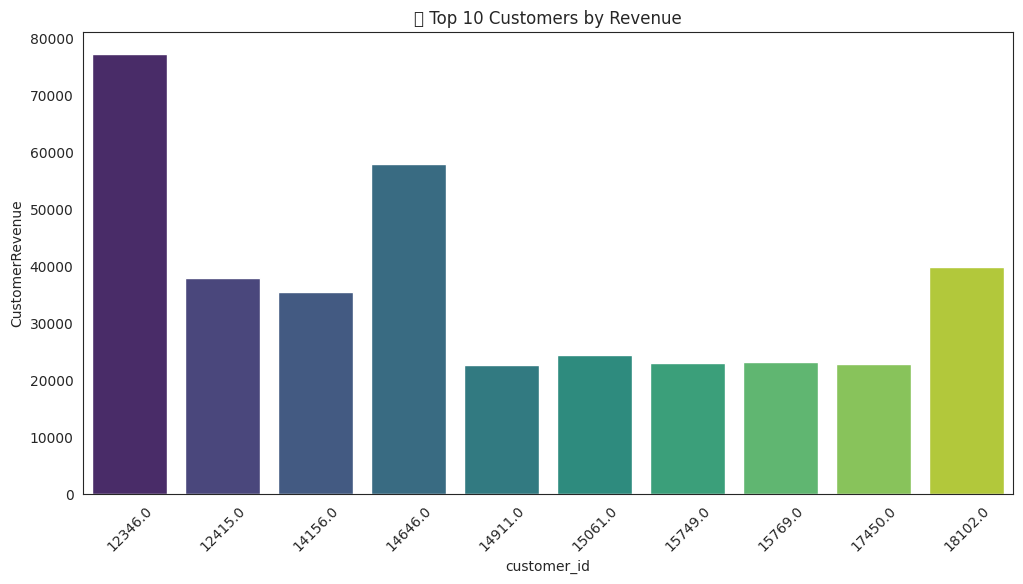

📊 أفضل 10 عملاء:
      customer_id  CustomerRevenue
0         12346.0         77183.60
773       14646.0         57866.02
1898      18102.0         39766.09
24        12415.0         37842.74
598       14156.0         35496.87
905       15061.0         24470.82
1134      15769.0         23181.48
1127      15749.0         22998.40
1686      17450.0         22748.74
858       14911.0         22719.76


In [ ]:
import pandas as pd
import seaborn as sns
    # افضل 10 عملاء
    plt.figure(figsize=(12,6))
    sns.barplot(data=top_customers, x=cust_col, y="CustomerRevenue", palette="viridis")
    plt.title("Top 10 Customers by Revenue")
    plt.xticks(rotation=45)
    plt.show()



In [ ]:
import pandas as pd
import plotly.express as px
# الكميه مع اجمالى المبيعات
px.scatter(
    product_summary,
    x='quantity',
    y='totalamount',
    size='totalamount',
    hover_name='description',
    title="Quantity vs Total Sales per Product",
    height=400
).show()


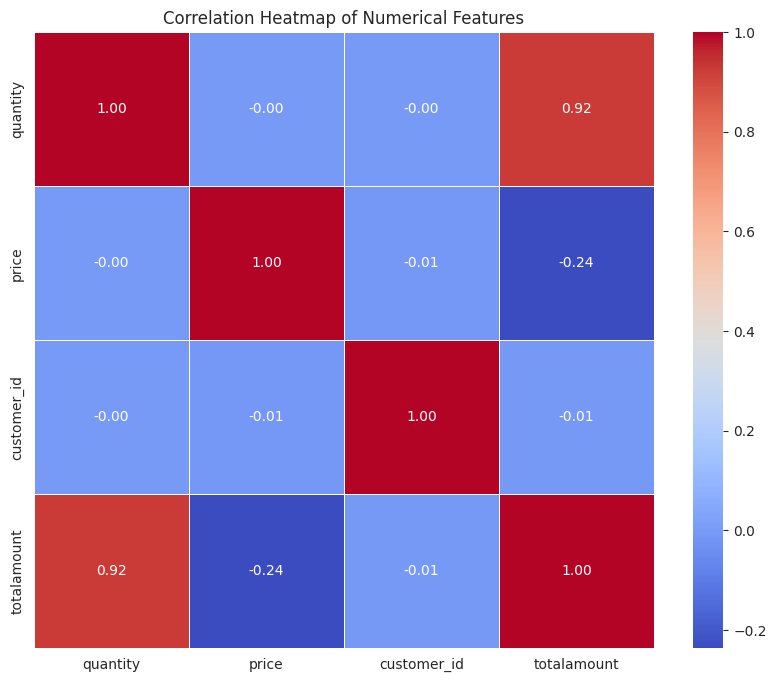

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

# رسم heatmap
plt.figure(figsize=(10,8))
sns.set_style("white")
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


/tmp/ipython-input-4073330150.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.values, y=country_sales.index, palette="crest")


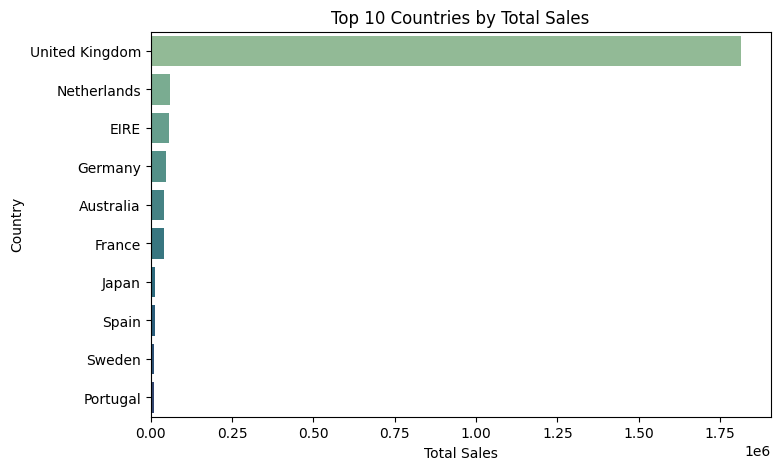

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# أفضل 10 دول حسب المبيعات
if 'country' in df.columns:
    country_sales = df.groupby('country')['totalamount'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(8,5))
    sns.barplot(x=country_sales.values, y=country_sales.index, palette="crest")
    plt.title("Top 10 Countries by Total Sales")
    plt.xlabel("Total Sales")
    plt.ylabel("Country")
    plt.show()



/tmp/ipython-input-2428747622.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


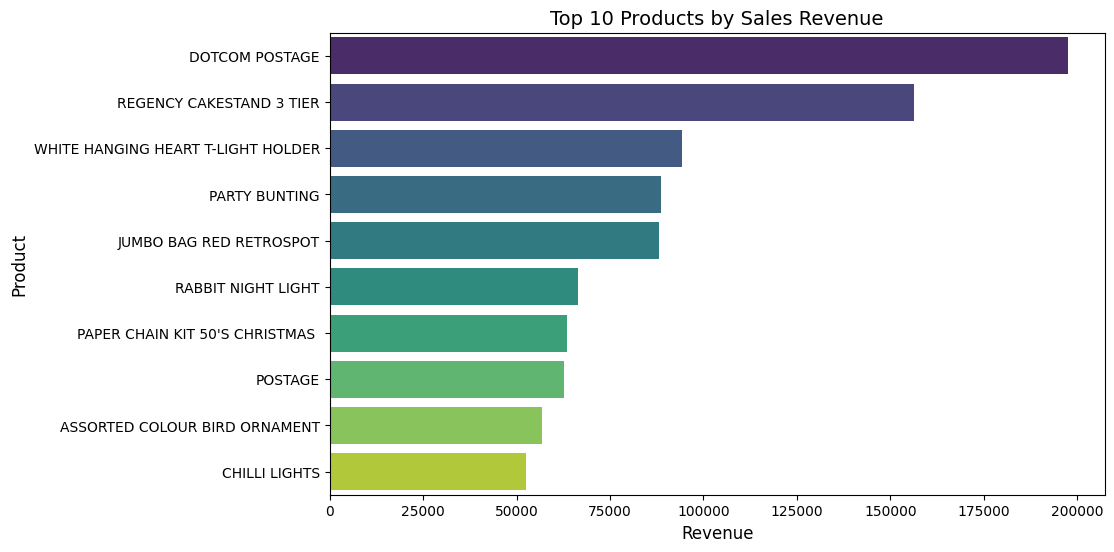

In [ ]:


# اعلى 10 منتجات حسب الايراد

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Sales Revenue", fontsize=14)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.figure(figsize=(10,6))
plt.show()


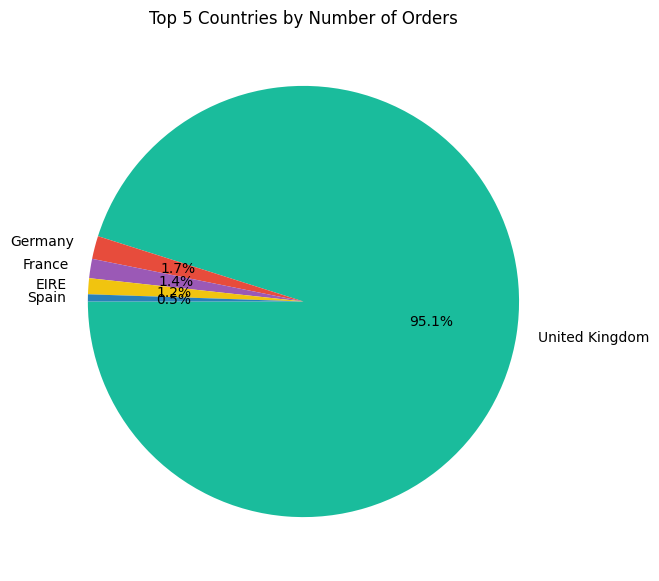

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# رسم Pie Chart لأفضل 5 دول حسب عدد الطلبات
if 'country' in df.columns:
    top_countries = df['country'].value_counts().head(5)
    plt.figure(figsize=(50,7))
    plt.title("Top 5 Countries by Number of Orders")
    plt.ylabel("")
    plt.show()

